# Mintun1984 for Twilite and Image-Derived Input Functions

## Setup

In [1]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

from Mintun1984Context import Mintun1984Context
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# everything is decay corrected
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "kernels")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")

oo1dir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421150523", "pet")
idif = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
twil = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
pet = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

hodir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421152358", "pet")
ks_idif = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Boxcar-main7-rc1p85-vrc1-3000-qm.nii.gz")
ks_twil = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Artery-main7-rc1p85-vrc1-3000-qm.nii.gz")

codir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421144815", "pet")
v1_idif = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-idif_martinv1.nii.gz")
v1_twil = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-twilite_martinv1.nii.gz")

data_dict_idif = {
    "input_func_fqfn": idif,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_idif,
    "ks_fqfn": ks_idif,
    "nlive": 1000,
    "tag": "playground_mintun1984_idif"
}
data_dict_twil = {
    "kernel_fqfn": kern,
    "input_func_fqfn": twil,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_twil,
    "ks_fqfn": ks_twil,
    "nlive": 1000,
    "tag": "playground_mintun1984_twil"
}

truth_idif = [2.02266859e-01, 1.30503331e+00, 7.19494722e-01, 1.00390665e+01, 9.82339382e+00, 1.74320833e+01, 1.72211248e-02]
truth_twil = [0.51932539, 0.68335921, 0.70828213, 4.55715122, 3.82516299, 6.14729027, 0.03415969]
mm_idif = Mintun1984Context(data_dict_idif)
mm_twil = Mintun1984Context(data_dict_twil)

parc_index = 25

## Inspect Mintun1984Context twil

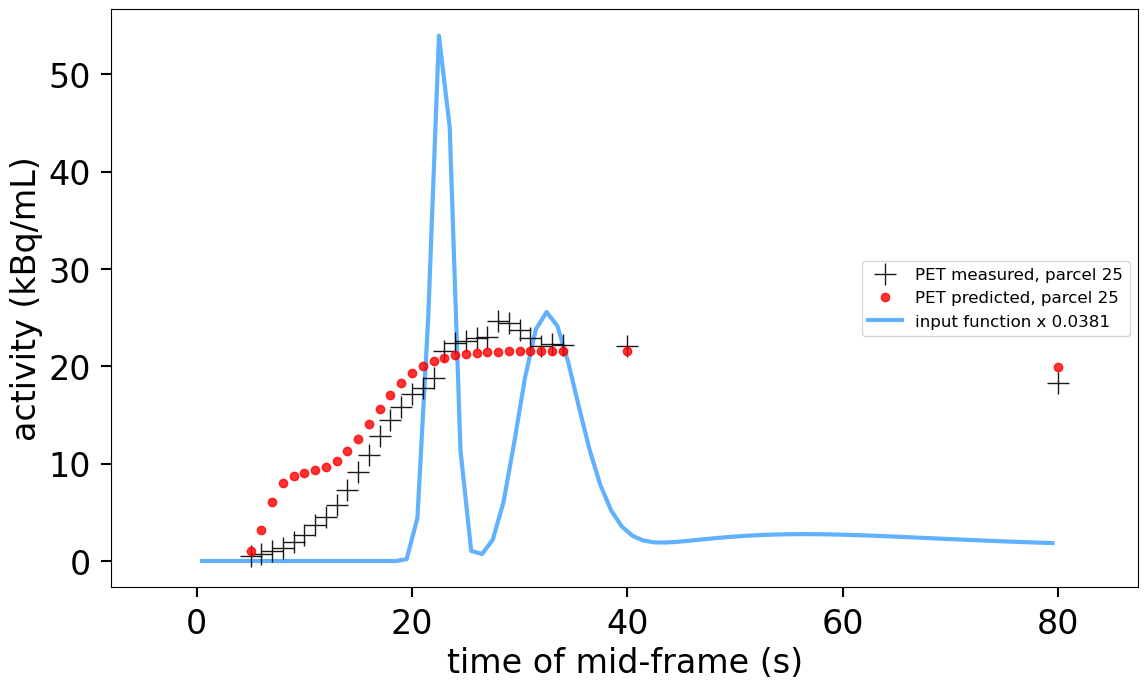

In [4]:
mm_twil.plotting.truths_plot(truths=truth_twil, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [5]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.solver.run_nested(print_progress=True, parc_index=range(10))

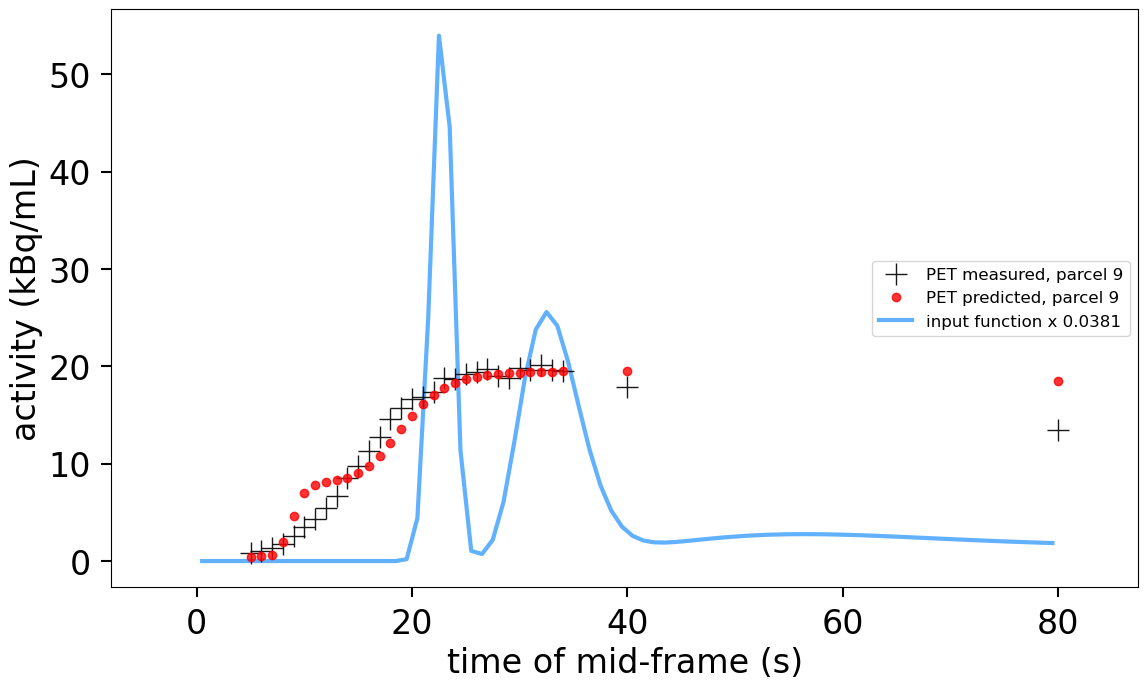

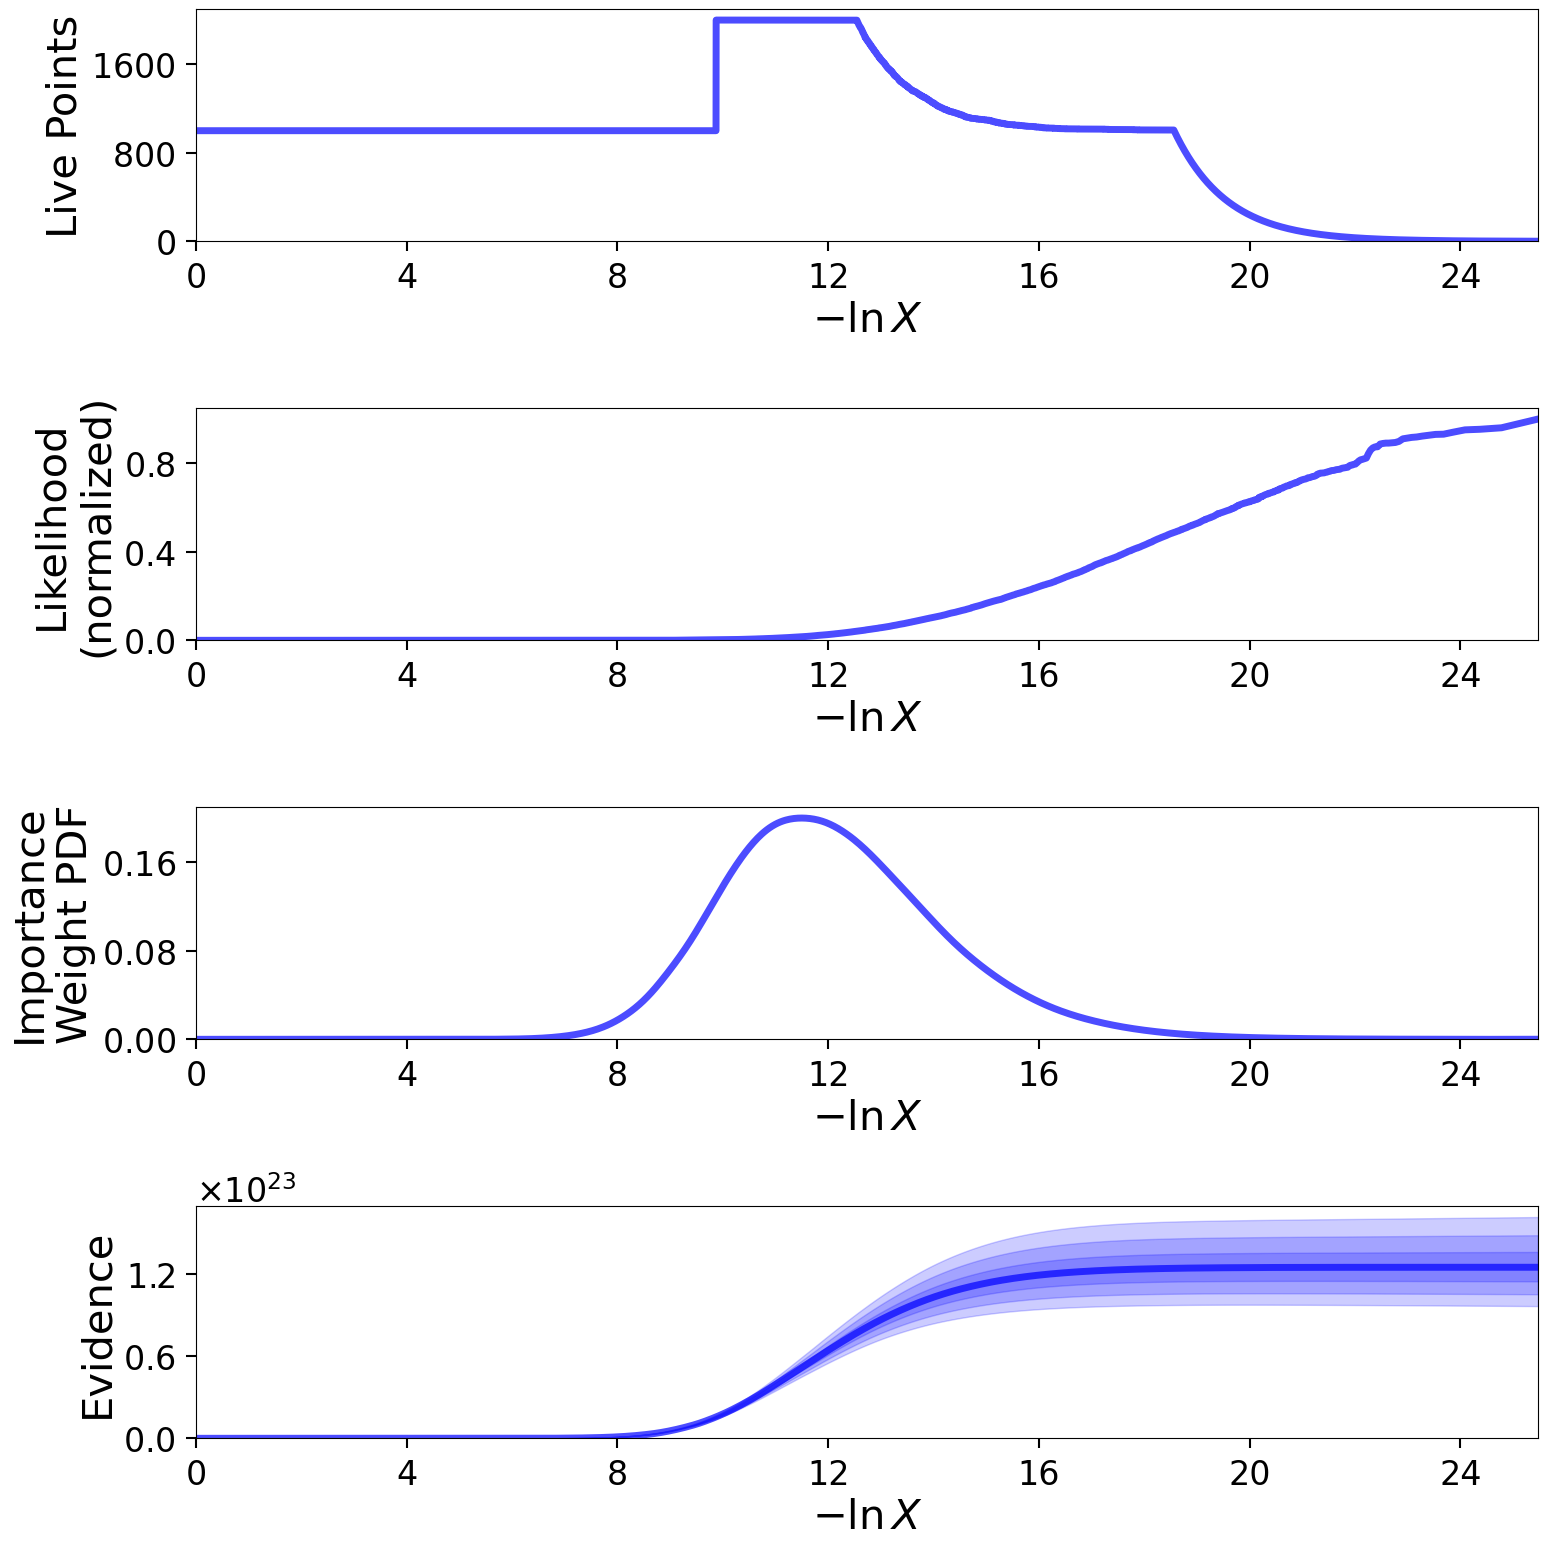

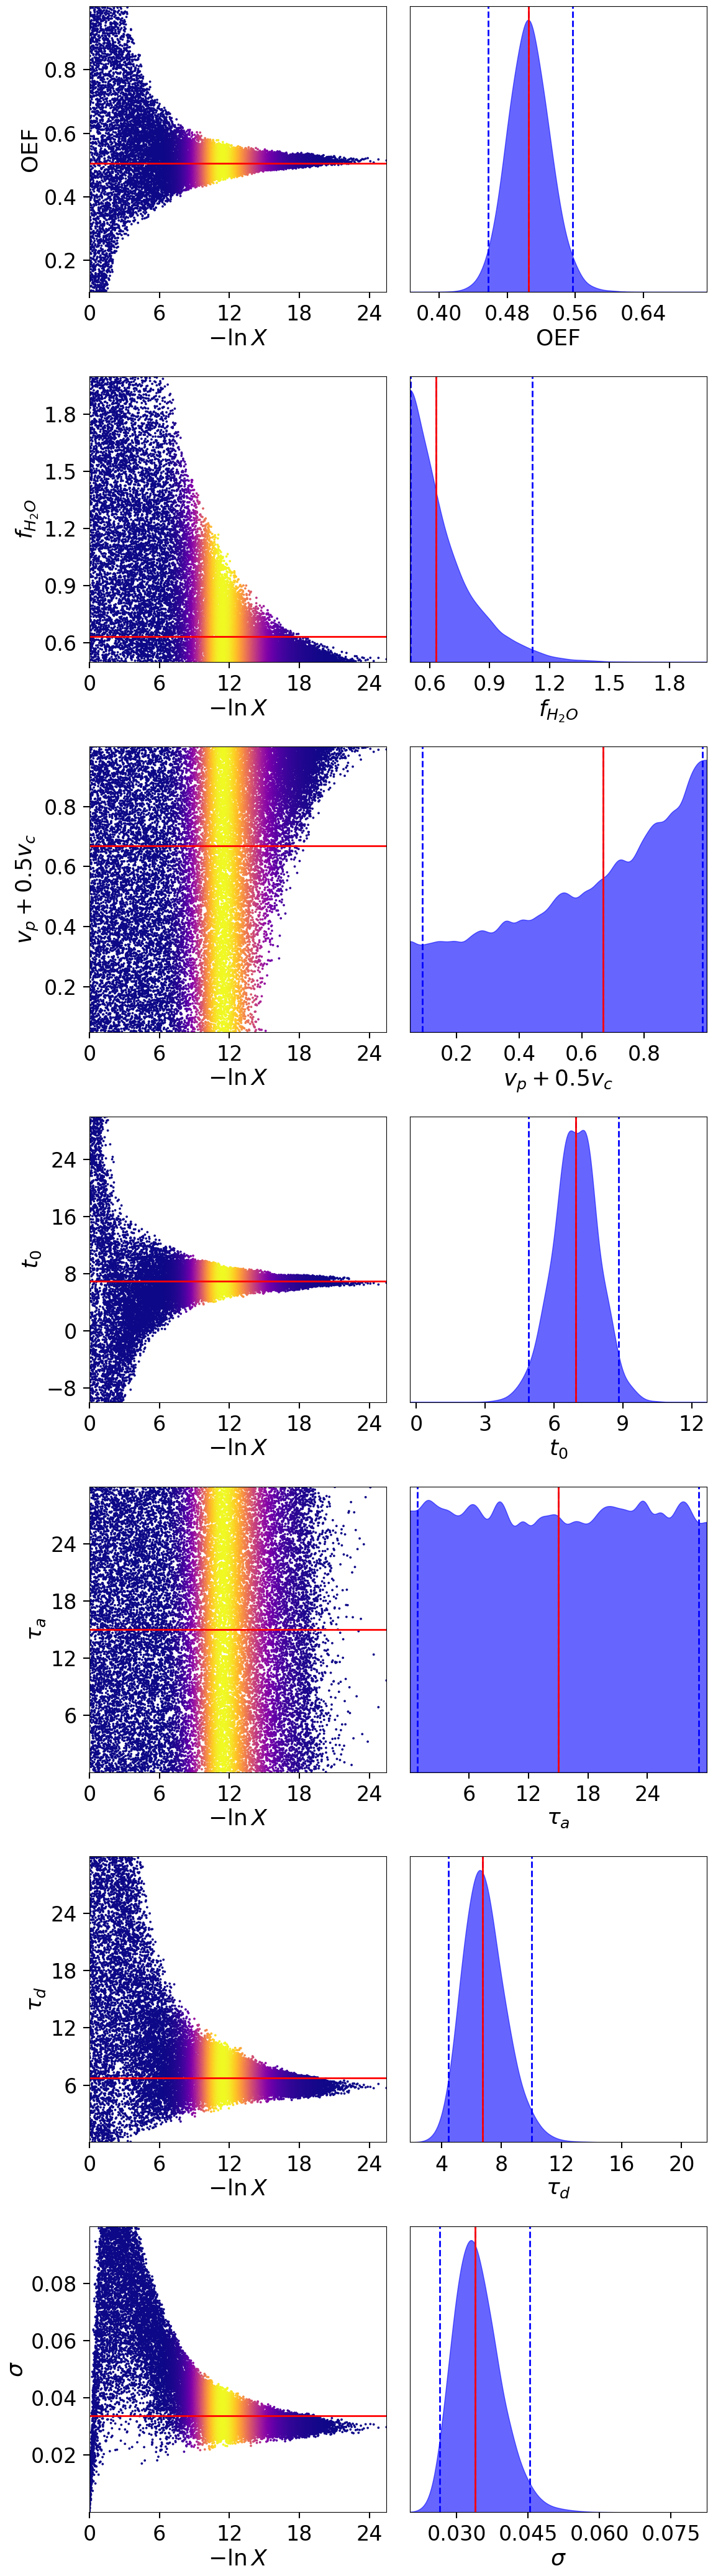

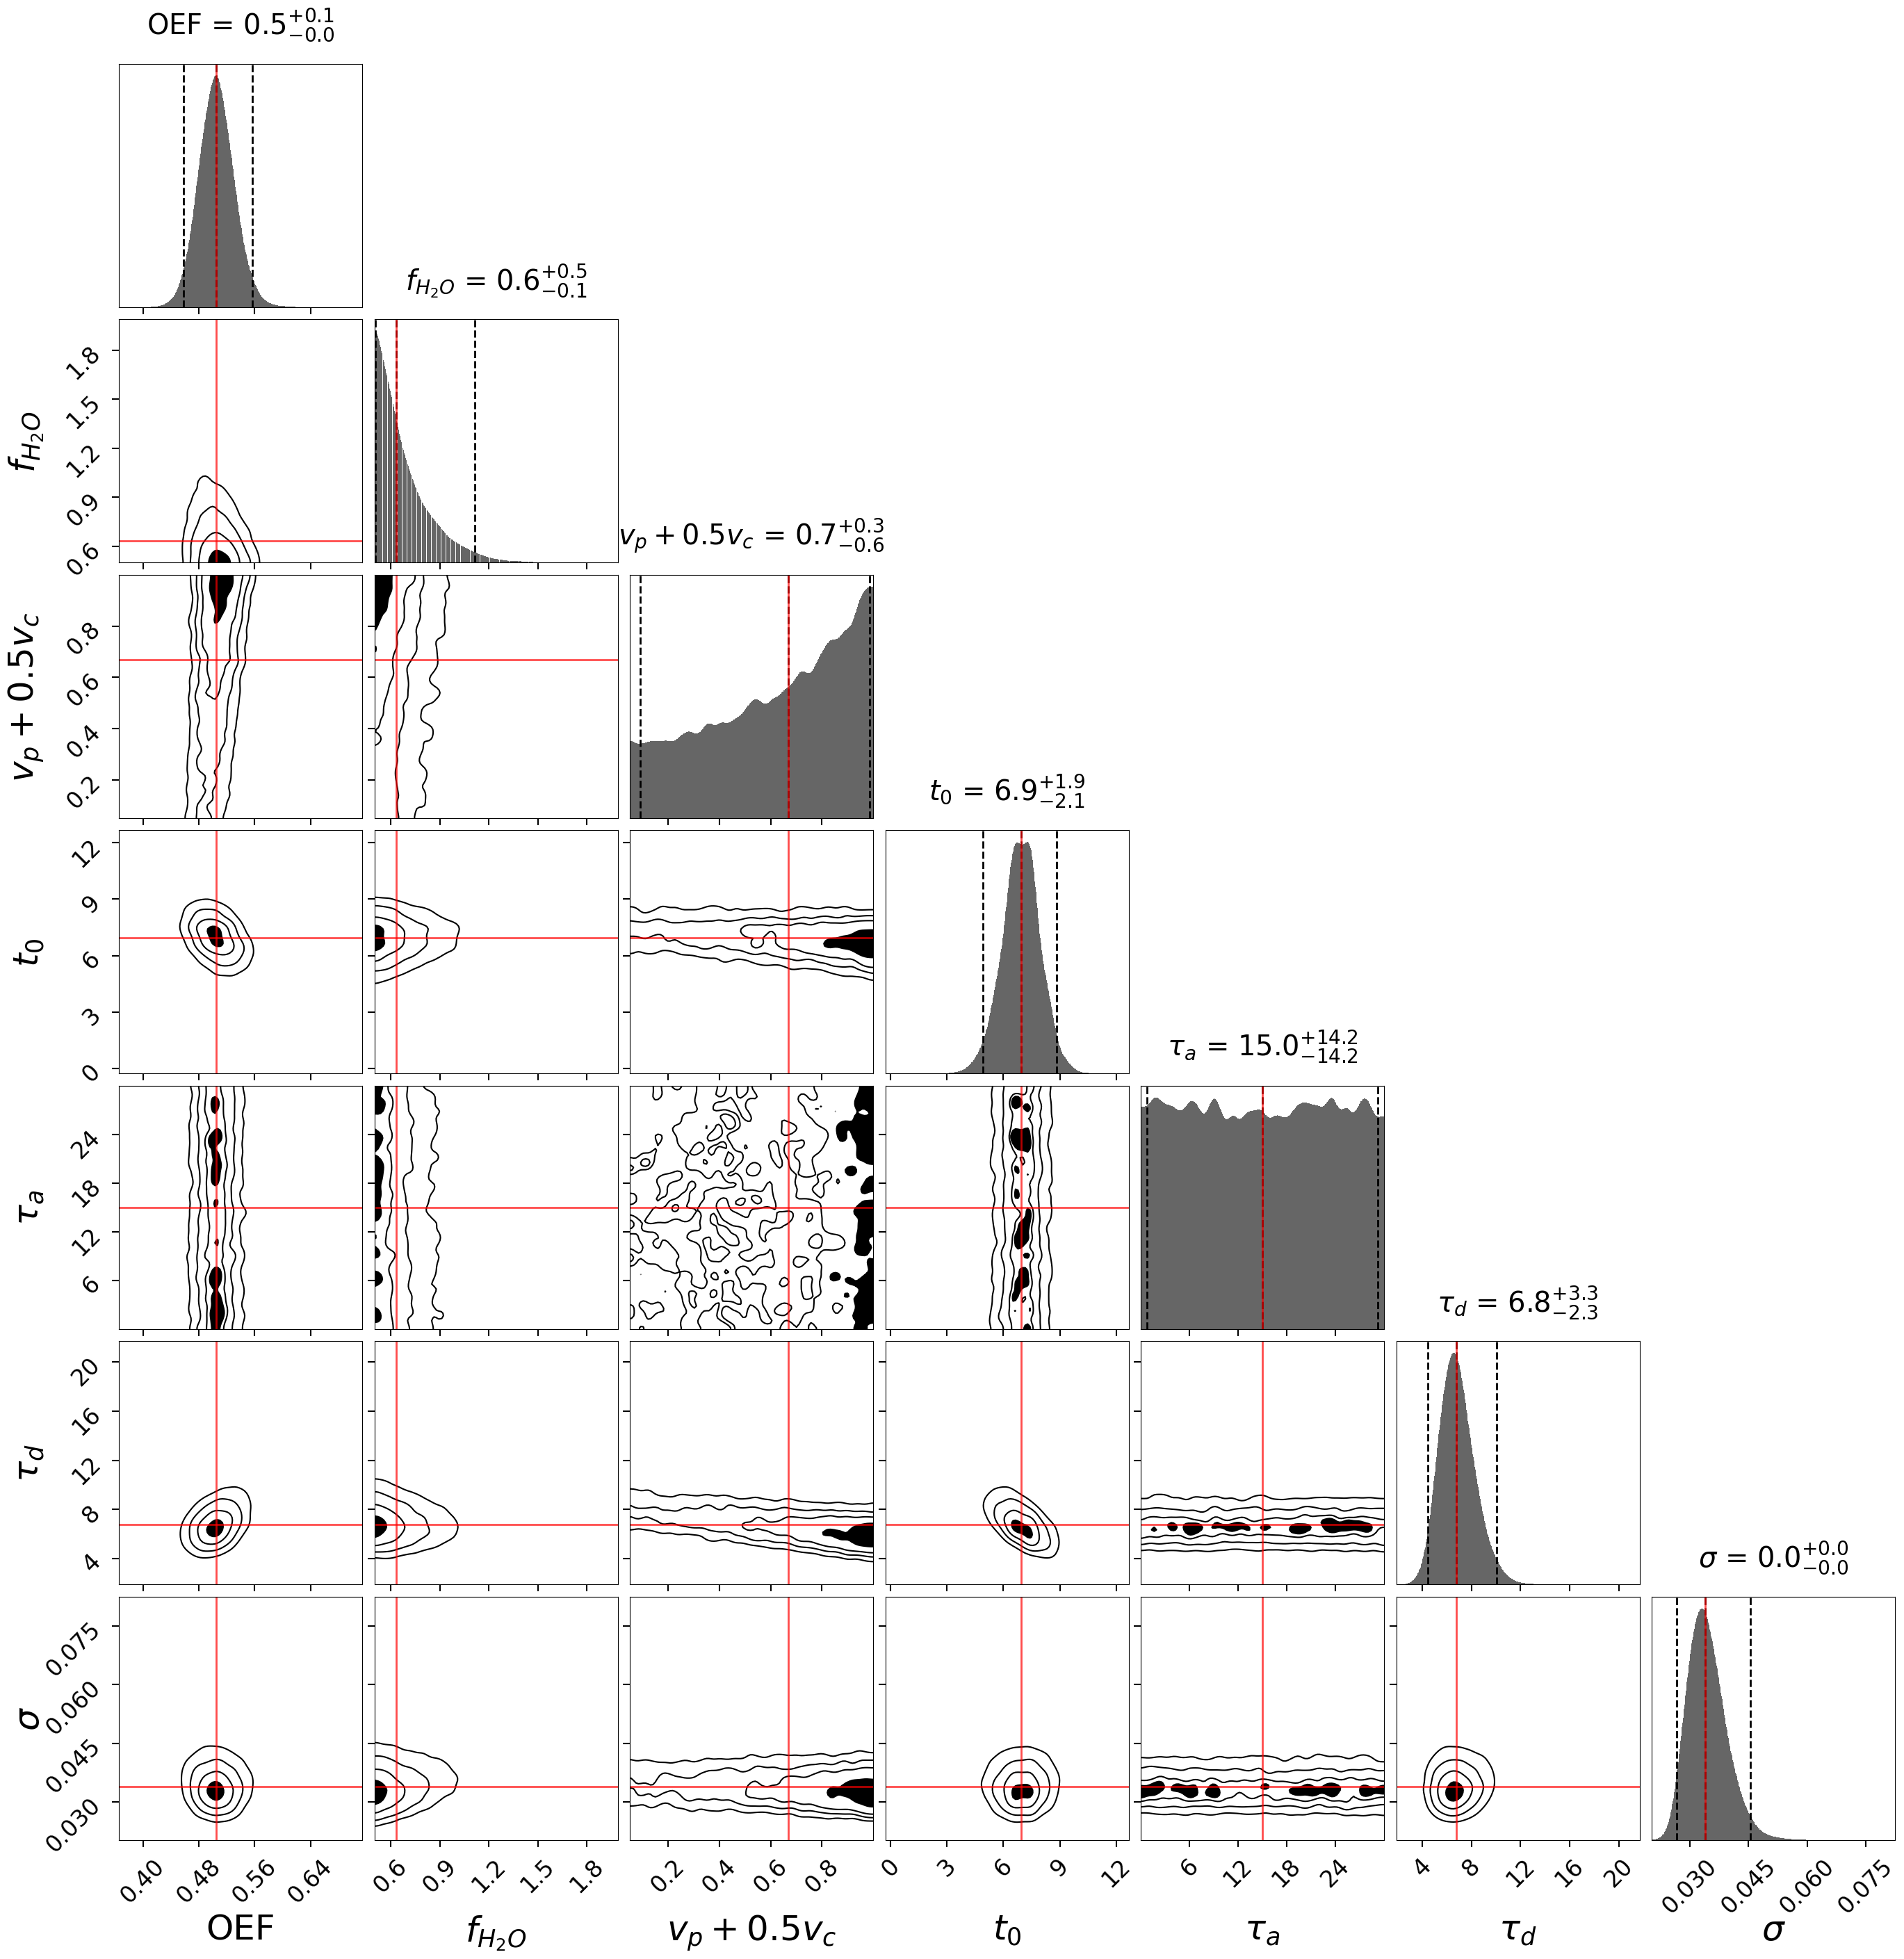

In [6]:
mm_twil.plotting.results_plot(tag="playground_mintun1984_twil", parc_index=9)

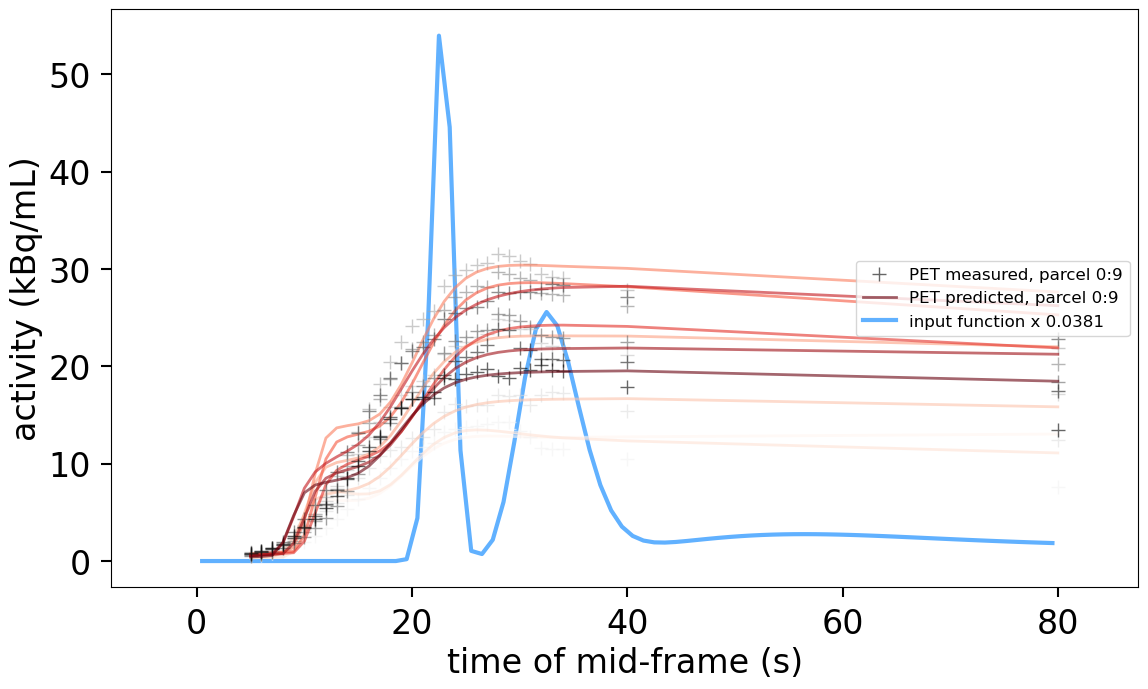

In [7]:
mm_twil.plotting.parcs_plot()

## Inspect Mintun1984Context idif

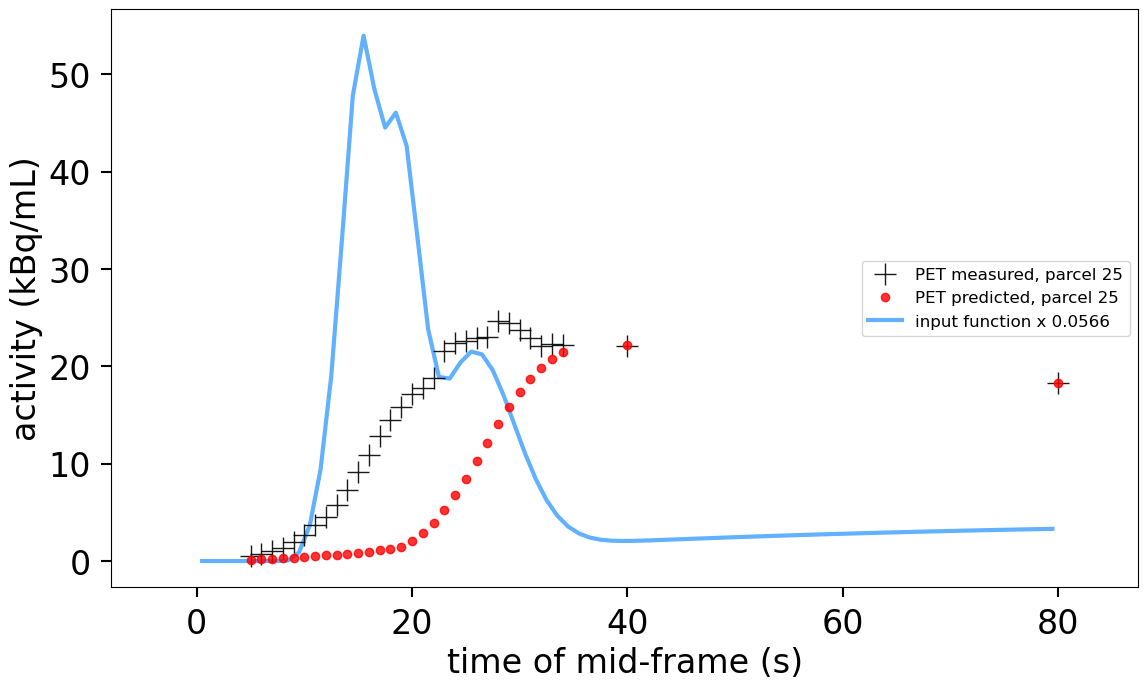

In [8]:
mm_idif.plotting.truths_plot(truths=truth_idif, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [9]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.solver.run_nested(print_progress=True, parc_index=range(10))

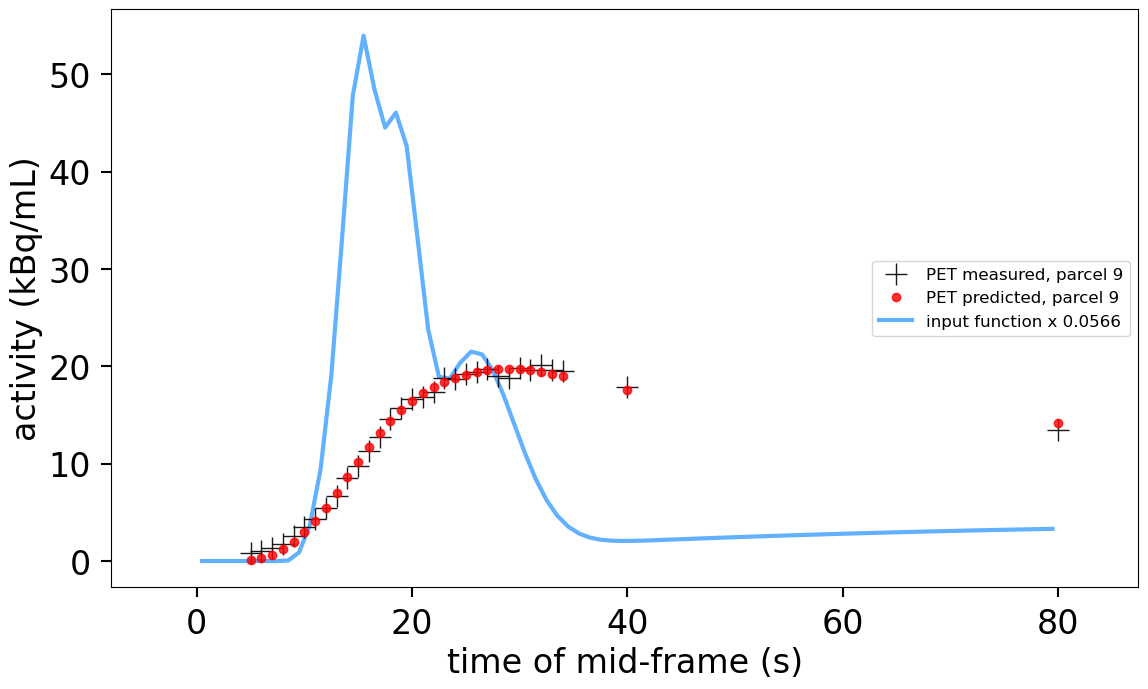

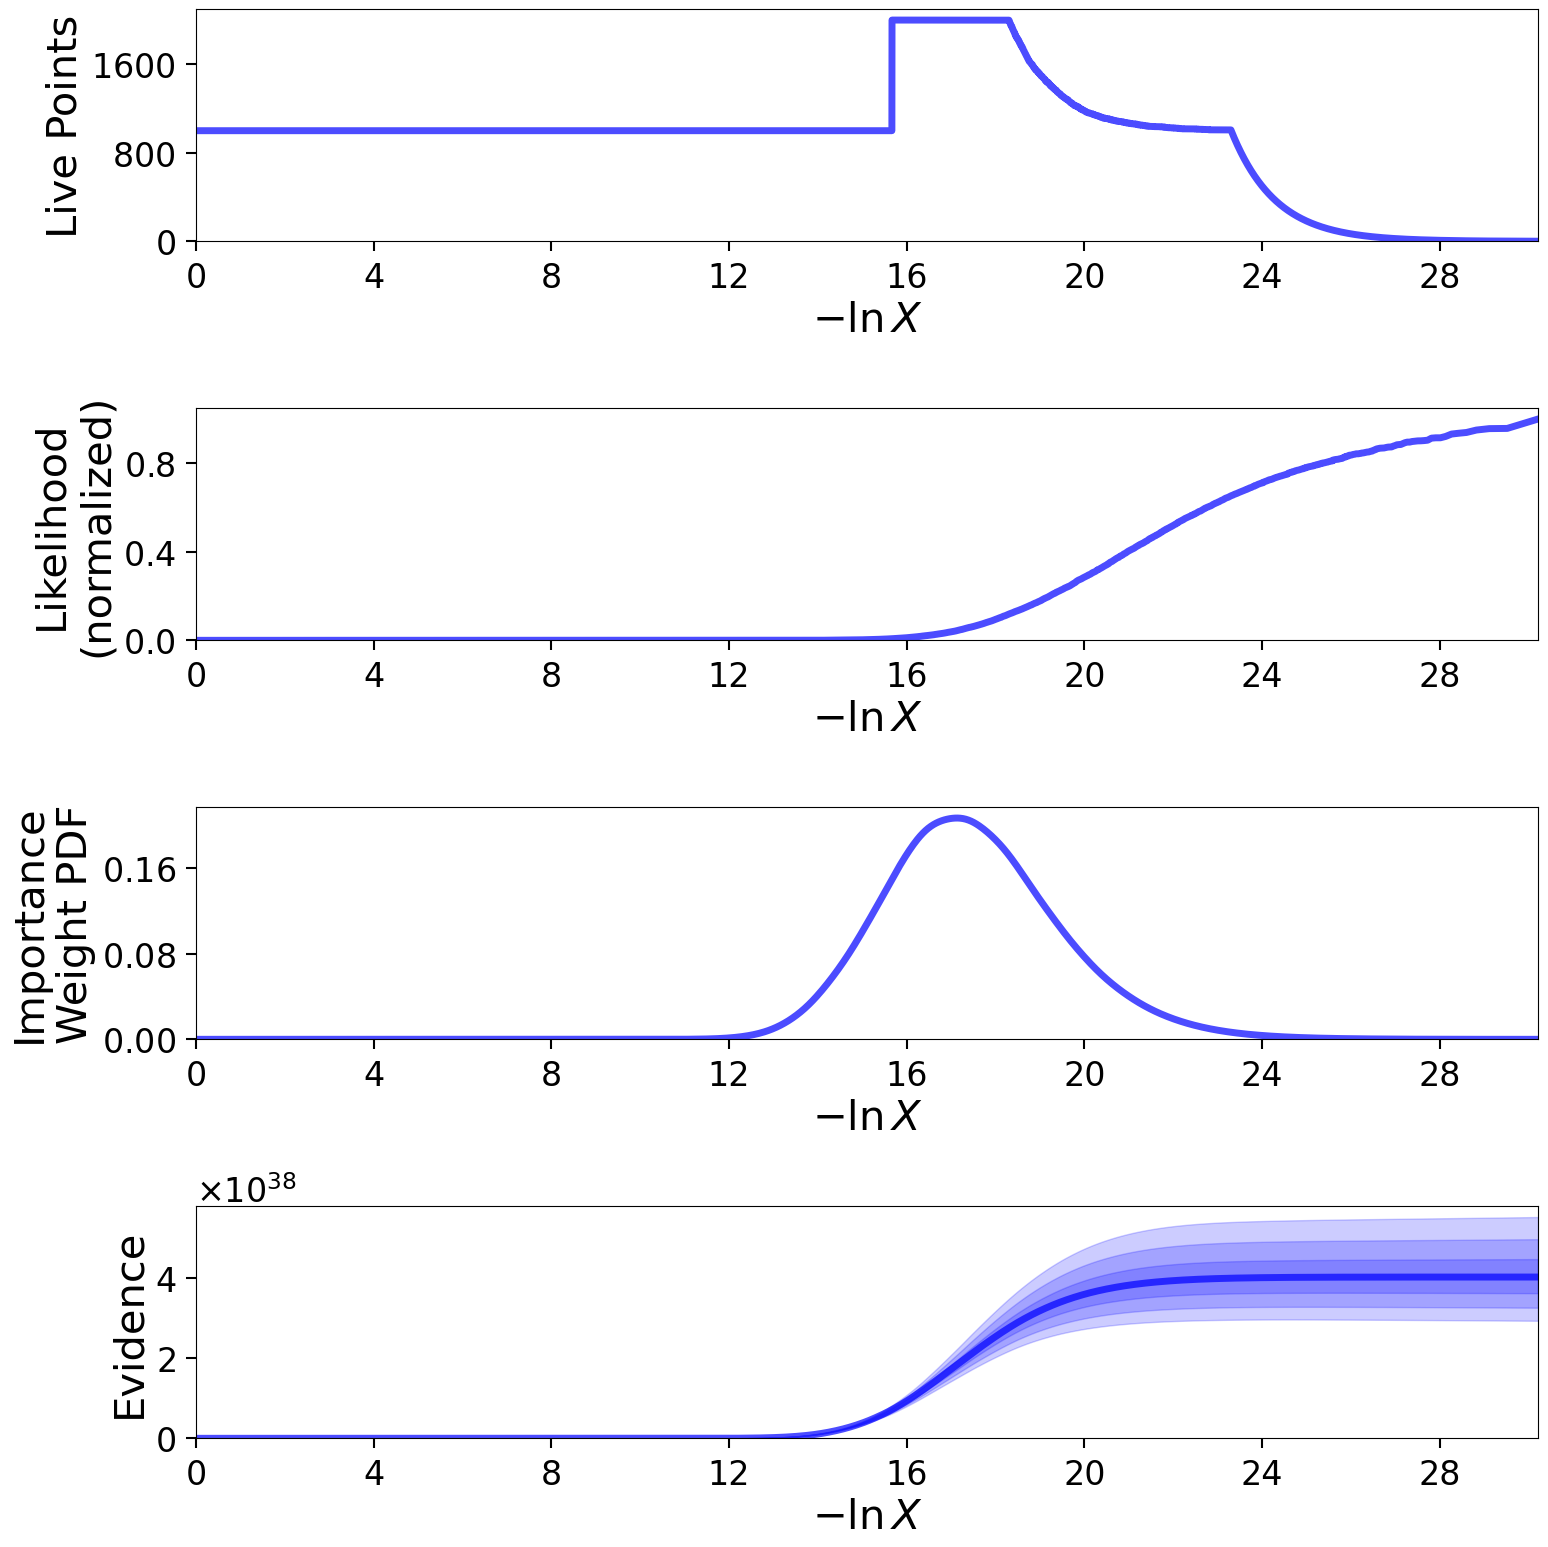

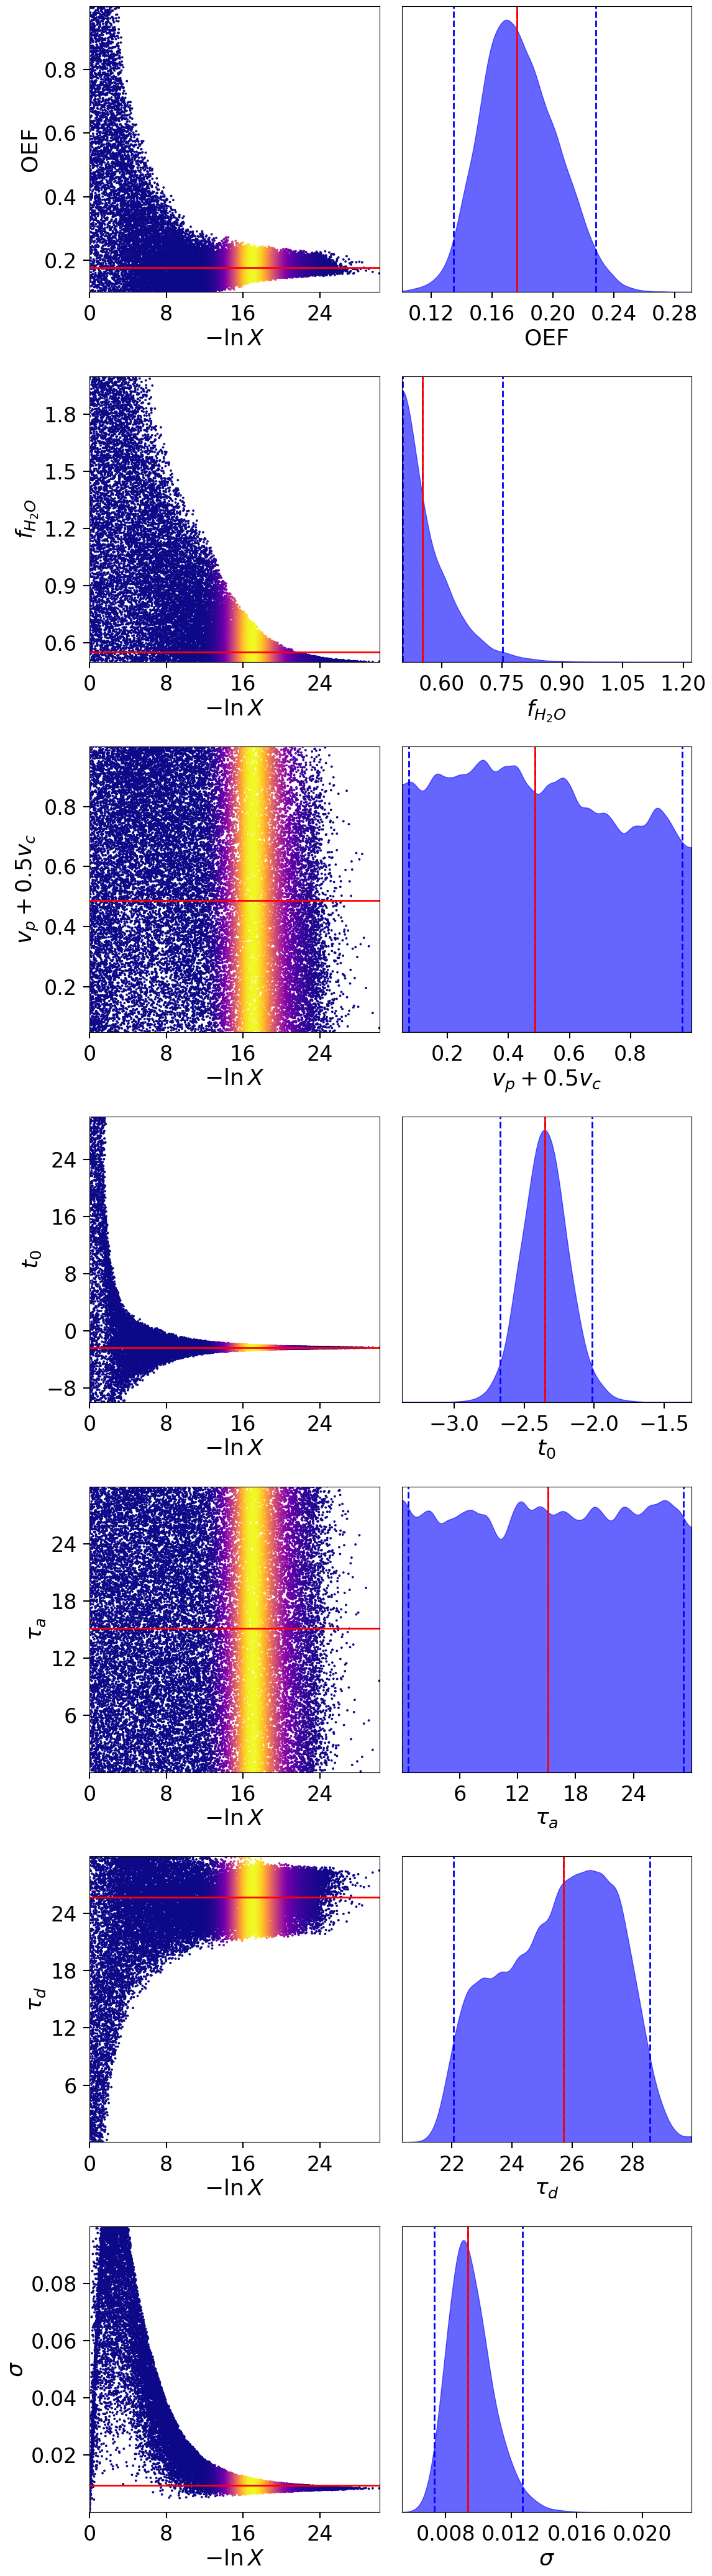

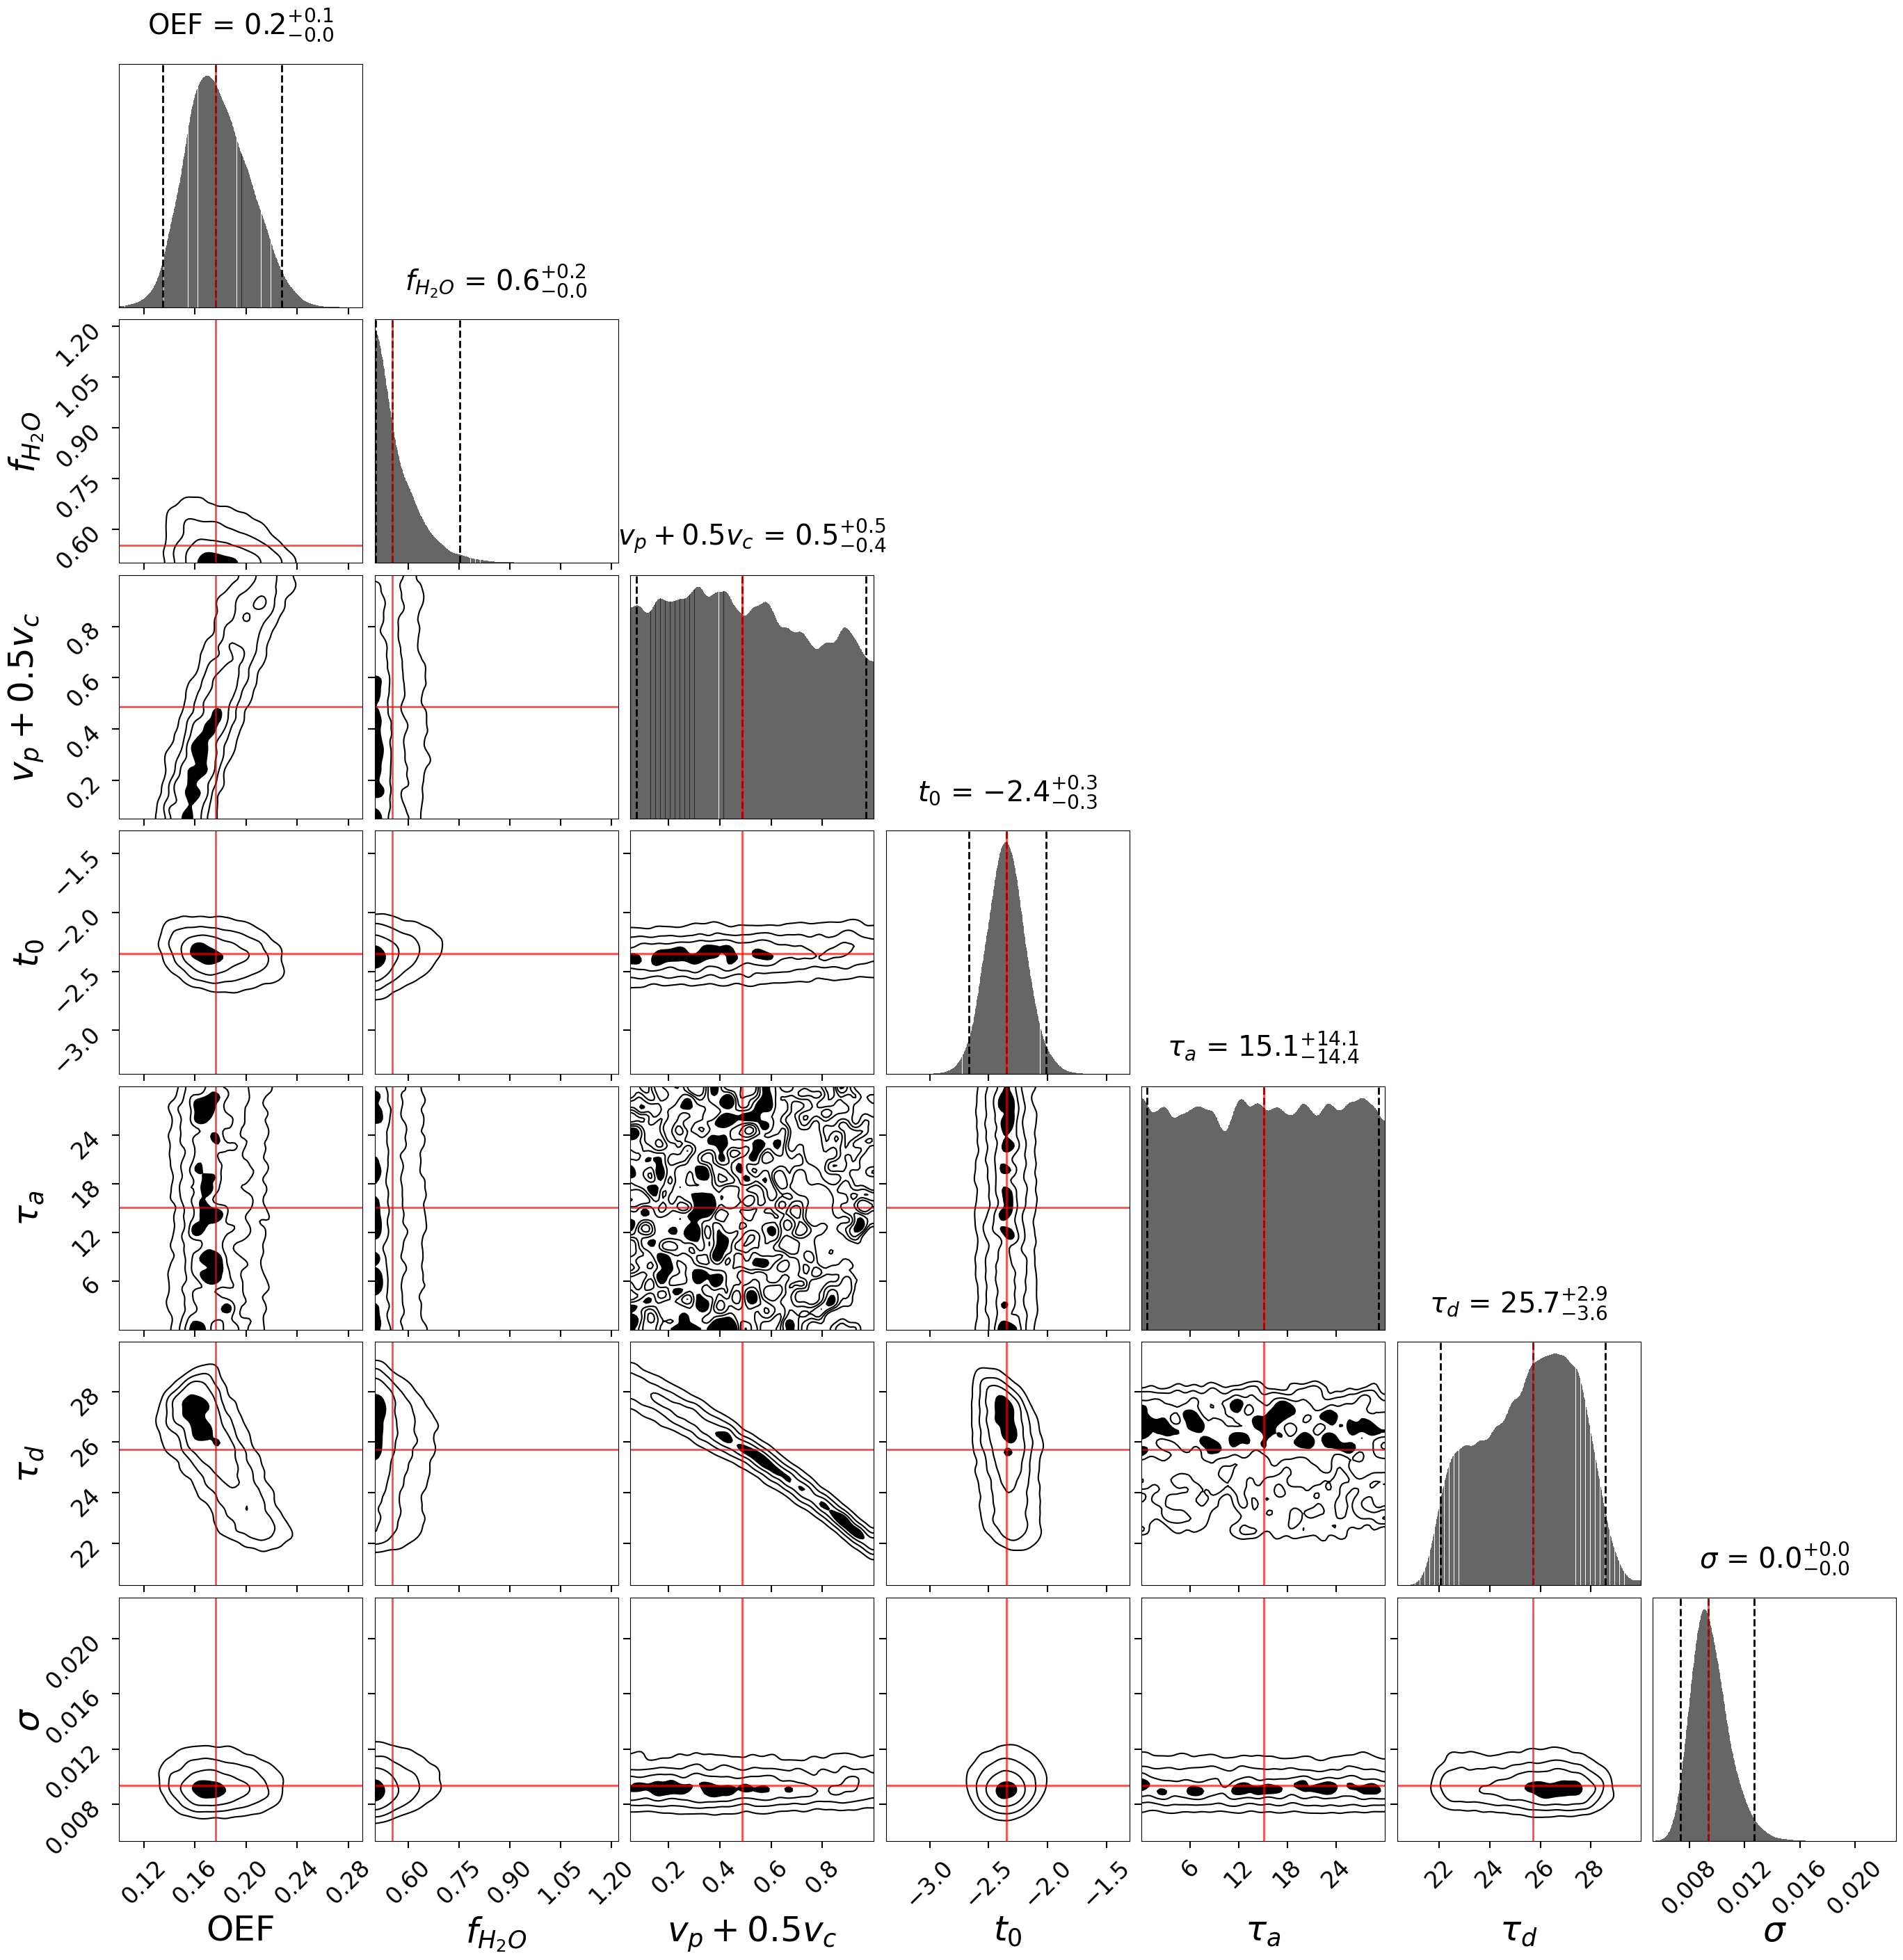

In [10]:
mm_idif.plotting.results_plot(tag="playground_mintun1984_idif", parc_index=9)

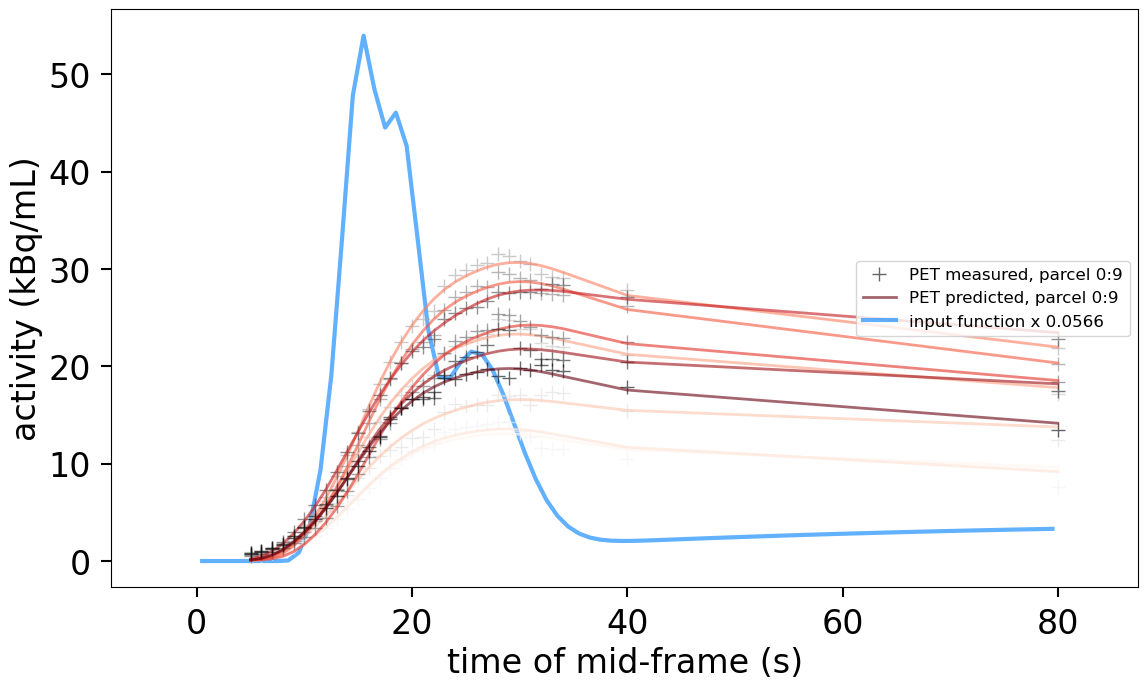

In [11]:
mm_idif.plotting.parcs_plot()

In [12]:
mm_twil.data.print_truths()
mm_idif.data.print_truths()



=============================== Truths ===============================
Parameter                        Value
----------------------------------------

Row 0:
OEF                            0.56130
$f_{H_2O}$                     0.69365
$v_p + 0.5 v_c$                0.45053
$t_0$                          7.96596
$\tau_a$                      14.50843
$\tau_d$                       6.16786
$\sigma$                       0.02453

Row 1:
OEF                            0.71174
$f_{H_2O}$                     0.89153
$v_p + 0.5 v_c$                0.33233
$t_0$                          8.56271
$\tau_a$                      15.22769
$\tau_d$                       6.60063
$\sigma$                       0.02936

Row 2:
OEF                            0.45997
$f_{H_2O}$                     0.59023
$v_p + 0.5 v_c$                0.72503
$t_0$                          7.62778
$\tau_a$                      14.85735
$\tau_d$                       6.76829
$\sigma$                       0.02289

Row

In [13]:
pprint(mm_twil.solver.truths)
pprint(mm_idif.solver.truths)

array([[ 0.5613037 ,  0.69365391,  0.4505255 ,  7.96595657, 14.50842856,
         6.16786361,  0.02453453],
       [ 0.71174108,  0.89153479,  0.33232931,  8.56270643, 15.22768794,
         6.60063213,  0.02936285],
       [ 0.45997155,  0.5902257 ,  0.72503279,  7.62778164, 14.85734914,
         6.76828933,  0.02289166],
       [ 0.54505117,  0.6510987 ,  0.67060532,  8.29064662, 15.2348941 ,
         5.4562327 ,  0.03618783],
       [ 0.58626475,  0.71862159,  0.63567098,  8.82153416, 15.04867113,
         6.16167646,  0.05115995],
       [ 0.52721711,  0.66712749,  0.65652709,  9.20164299, 14.92364125,
         5.6589326 ,  0.04572664],
       [ 0.55406115,  0.6709693 ,  0.71687465,  9.17864909, 15.20621156,
         5.22420978,  0.03398395],
       [ 0.55901377,  0.63912267,  0.79533848,  7.18608579, 14.81922901,
         6.02664884,  0.03300074],
       [ 0.56892441,  0.64844668,  0.71048656,  8.20790976, 14.92796901,
         4.70049888,  0.0314763 ],
       [ 0.50500699,  0.6318